# Evaluating Classifiers

**Overview**
This exercise is about evaluation metrics for binary classification. 
The main focus is to evaluate a classification model, irrespective of which model (linear or non-linear) is being used.

Recall that the confusion matrix for binary classification problems has the following structure:

$$
\begin{array}{cc|c|c|}
  & & \text{Predicted Negative} & \text{Predicted Positive} \\
\hline
\text{Actual Negative} & & TN & FP \\
\hline
\text{Actual Positive} & & FN & TP \\
\end{array}
$$
- **TN** - True Negative
- **FN** - False Negative 
- **FP** - False positive
- **TP** - True Positive


<article class="message">
    <div class="message-body">
        <strong>List of individual tasks</strong>
        <ul style="list-style: none;">
            <li>
            <a href="#import">Task 1: Generating Data</a>
            </li>
            <li>
            <a href="#First">Task 2: Training a random Classifier</a>
            </li>
            <li>
            <a href="#accuracy">Task 3: Model accuracy</a>
            </li>
            <li>
            <a href="#classif_report">Task 4: Evaluation</a>
            </li>
            <li>
            <a href="#svc_model">Task 5: Class Imbalance visualization reflection</a>
            </li>
            <li>
            <a href="#metrics">Task 6: ROC and Precision-Recall curves evaluati…</a>
            </li>
        </ul>
    </div>
</article>

## Generating Data

---
**Task 1 (easy): Generating Data👩‍💻**
1. Run the cell below to generate a dataset comprising of 500 samples, 20 features, and 2 classes. This dataset is partitioned using an 80-20 train-test split.


---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_curve, auc, average_precision_score, roc_curve
import classifier_util

import warnings
warnings.filterwarnings("ignore")


X,Y  = datasets.make_classification(n_samples=500, n_features=20, n_classes=2, random_state=1)
print('Dataset Size : ',X.shape,Y.shape)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.80, test_size=0.20, stratify=Y, random_state=1)
print('Train/Test Size : ', X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

Dataset Size :  (500, 20) (500,)
Train/Test Size :  (400, 20) (100, 20) (400,) (100,)


## Performance Metrics
In the following task you will evaluate the model's performance on the test data using different metrics. 

---
**Task 2 (easy): Training a random Classifier👩‍💻**
1. Run the cell below to train a random Classifier.


---

In [2]:
classifier1 = classifier_util.RandomClassifier(random_state=1, C=0.1)
classifier1.fit(X_train, Y_train)


---
**Task 3 (easy): Model accuracy👩‍💻**
Classification accuracy is given by 
$$ \text{accuracy} = \frac{\text{Number of correct predictions}}{\text{Total number of predictions}}$$
 
Run the following cell to make predictions using the `RandomClassifier`
 on the test and training sets. Calculate accuracy by comparing predictions to actual labels: 
1. Calculate model accuracy on the training set.
2. Calculate model accuracy on the test set.
3. Run the cell below to construct and plot the confusion matrix of the model predictions on the training set. 
4. Construct and plot the confusion matrix of the model predictions on the test set. 


---

Training accuracy: 0.9525
Test accuracy: 0.93


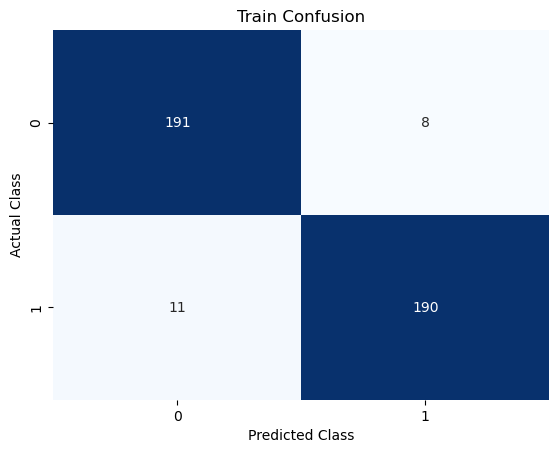

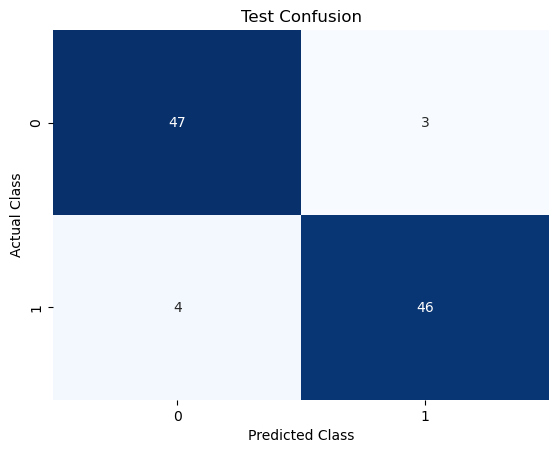

In [8]:
Y_preds = classifier1.predict(X_test)
Y_preds2 = classifier1.predict(X_train)

# Calculate accuracy here ... 
print('Training accuracy:', len(list(filter(lambda t: t[0] == t[1], zip(Y_preds2, Y_train))))/len(Y_preds2))
print('Test accuracy:', len(list(filter(lambda t: t[0] == t[1], zip(Y_preds, Y_test))))/len(Y_test))

conf_mat_train = confusion_matrix(Y_train, Y_preds2)
sns.heatmap(conf_mat_train, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.title('Train Confusion')
plt.show()

conf_mat_test = confusion_matrix(Y_test, Y_preds)
sns.heatmap(conf_mat_test, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.title('Test Confusion')
plt.show()

**Performance metrics**

**Recall from the lecture**
Performance metrics such as **precision**, **recall**, **F$_1$-score**, **specificity** and **Matthews Correlation Coefficient (MCC)**  provide different views of the performance of the classifier.
- **Precision** - or positive predictive value, represents how many predictions of the positive class actually belong to that class. 

$$
\frac{𝑇𝑃}{𝑇𝑃+𝐹𝑃}
$$


- **Recall** -  also known as sensitivity, true positive rate, or hit rate assesses whether the classifier correctly identifies positive instances out of the total actual postive instances. 

$$
\frac{𝑇𝑃}{𝑇𝑃+𝐹𝑁} 
$$


- **F$_1$-score** - harmonic mean of precision & recall. 

$$
2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision}+\text{Recall}} 
$$


- **Specificity** - also known as the true negative rate, is the percentage of correctly predicted instances of the negative class. 

$$
\frac{TN}{TN+FP} 
$$


- **Matthews Correlation Coefficient (MCC)** - also known as the phi coefficient, is a correlation-based metric that measures the quality of binary classifications, even with imbalanced classes.

$$ 
MCC=\frac{TP \cdot TN-FP \cdot FN}{\sqrt{(TP+FP)(TP+FN)(TN+FP)(TN+FN)}}
$$





---
**Task 4 (easy): Performance metrics👩‍💻**
1. Use the confusion matrix of the test data from [Task 3](#accuracy) to find and store the true positive, false positive, true negative and false negative values. 

2. In the cell below calculate the following evaluation metrics for the classification model:
    - Precision
    - Recall
    - F1-score
    - Specificity
    - MCC




---

In [20]:
# write your solution here

def BD_metrics(conf_mat):
    TP, FP = conf_mat[0]
    FN, TN = conf_mat[1]
    precision = TP/(TP+FP)
    recall = TP/(TP+FN)
    f1_score = 2 * (precision*recall)/(precision+recall)
    specificity = TN/(TN+FP)
    mcc = (TP*TN-FP*FN)/np.sqrt((TP+FP)*(TP+FN)*(TN+FP)*(TN+FN))

    return precision, recall, f1_score, specificity, mcc

precision, recall, f1_score, specificity, mcc = BD_metrics(conf_mat_train)

print(f"precision: {precision}", f"recall: {recall}", f"f1_score: {f1_score}", f"specificity: {specificity}", f"mcc: {mcc}", sep="\n")

precision: 0.9597989949748744
recall: 0.9455445544554455
f1_score: 0.9526184538653367
specificity: 0.9595959595959596
mcc: 0.9051065697970552



---
**Task 5 (easy): Evaluation💡📽️**
1. Inspect the metrics and reflect on how they individually help in understanding and evaluating the performance of a classification model?
2. How does the MCC help you assess the performance of the models?


---

In [14]:
# Write your reflections here...
"""
They are all different meter-sticks to measure different properties and values from the classifier
It is likely not possible to increase all the measurements at once since they affect each other in different way 
    e.g. increasing Precision will most likely decrease Recall

MCC: is a correlation-based metric that measures the quality of binary classifications, even with imbalanced classes.
"""

'\nThey are all different meter-sticks to measure different properties and values from the classifier\nIt is likely not possible to increase all the measurements at once since they affect each other in different way \n    e.g. increasing Precision will most likely decrease Recall\n\nMCC: is a correlation-based metric that measures the quality of binary classifications, even with imbalanced classes.\n'

## Imbalanced Classes
The cell below generates a dataset with 1,000 samples across 10 classes. Then an imbalanced dataset is created by combining 9 classes such that all samples in class 0 are marked as positive, while samples in the remaining classes are marked as negative. This results in a 10% positive and 90% negative distribution.


In [21]:
X, Y = datasets.make_classification(n_samples=1000, n_classes=10, n_informative=10)

# Mark the minority class as True
Y = (Y == 0).astype(int)

print('Dataset Size:', X.shape, Y.shape)

# Check the imbalance ratio
imbalance_ratio_actual = np.mean(Y)
print(f'Imbalance Ratio (Positive/Minority Class): {imbalance_ratio_actual:.2f}')

Dataset Size: (1000, 20) (1000,)
Imbalance Ratio (Positive/Minority Class): 0.10



---
**Task 6 (hard): Class Imbalance👩‍💻**
The following task will evaluate `classifier2`
 on the imbalanced dataset.
1. The cell below includes the classifier, variables to store performance metrics, and an incomplete for-loop that performs data splitting for 5-fold cross-validation. Complete the loop so that for each fold:    - Train a `classifier2`
 on the training folds. 
    - Predict labels on the validation folds.
    - Calculate the confusion matrix and the performance metrics on the validation sets (precision, recall, F1-Score, specificity, MCC). Print the average of each metric (use `np.nanmean()`
 as some of these metrics might inlcude NaNs). 




**Info**
In the cell below, the data is randomized before each split. This can lead to slight variations in model performance metrics and graphs, so different results can be expected with each run.


---

In [24]:
classifier2 = classifier_util.RandomClassifier2()

accuracies= [] # I sense redundancy
accuracies, precisions, recalls, f1_scores, specificities, mccs = [], [], [], [], [], []


for train_idx_svc, test_idx_svc in KFold(n_splits=5, shuffle=True).split(X):
    X_train, X_test = X[train_idx_svc], X[test_idx_svc]
    Y_train, Y_test = Y[train_idx_svc], Y[test_idx_svc]

    # write your solution here
    classifier2.fit(X_train, Y_train)
    pred = classifier2.predict(X_test)
    conf_matrix = confusion_matrix(Y_test, pred)
    precision, recall, f1_score, specificity, mcc = BD_metrics(conf_matrix)
    accuracies.append((conf_matrix[0][0]+conf_matrix[1][1]) / (conf_matrix[0][0]+conf_matrix[1][1]+conf_matrix[0][1]+conf_matrix[1][0]))
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1_score)
    specificities.append(specificity)
    mccs.append(mcc)

print(
        f'accuracies: {np.nanmean(accuracies)}', 
        f'precisions: {np.nanmean(precisions)}', 
        f'recalls: {np.nanmean(recalls)}', 
        f'f1_scores: {np.nanmean(f1_scores)}', 
        f'specificities: {np.nanmean(specificities)}', 
        f'mccs: {np.nanmean(mccs)}', 
        sep="\n"
    )
    
    

accuracies: 0.909
precisions: 1.0
recalls: 0.9082807724207873
f1_scores: 0.9517622268746132
specificities: 1.0
mccs: 0.33252212505826656



---
**Task 7 (hard): Class Imbalance💡📽️**
The following task will evaluate `classifier2`
 on the imbalanced dataset.
1. Why do some of the metrics return NaNs?
2. Is the model able to reliably identify the minority class? 
3. What are the implications for the model's performance and its practical utility?
4. How does the MCC help you assess the performance of the models, especially regarding their ability to handle class imbalance? 


---

In [0]:
# Write your reflections here...
"""
1.
division by 0 = end of the world.... or NaN

2.
no because mcc

3.
low scores means bad predictions

4.
you see, where all the other metrics made it look like the model was perfect, the mcc sucked. The mcc will unalive the bad models
"""


---
**Task 8 (hard): Class Imbalance visualization👩‍💻**
1. Run the cell below to plot all the metrics in the same plot.


**Info**
In the cell below, the data is randomized before each split. This can lead to slight variations in model performance metrics and graphs, so different results can be expected with each run.


---

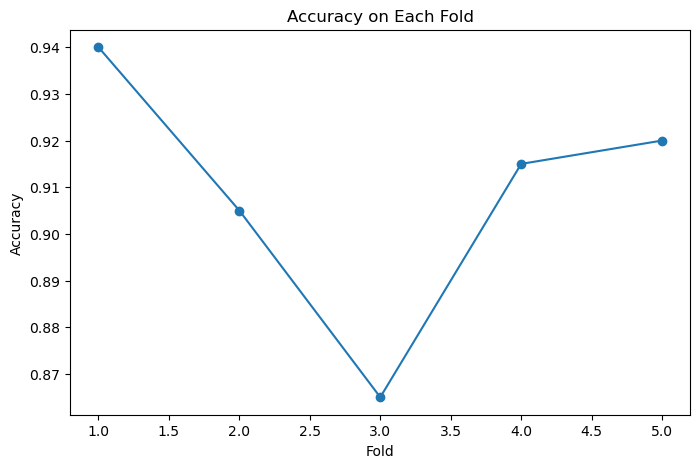

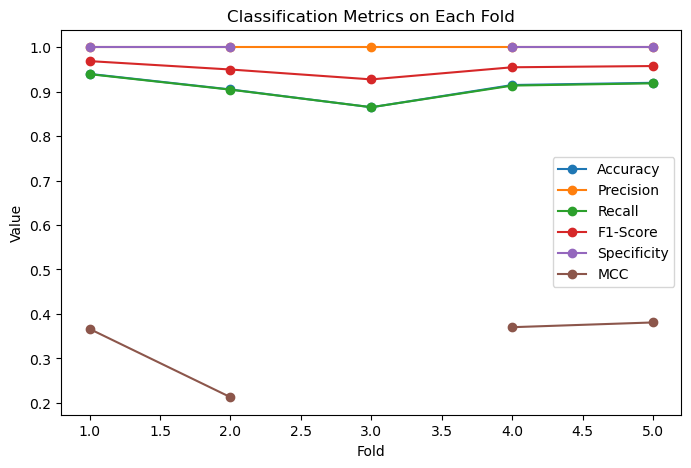

In [25]:
# Step 2
plt.figure(figsize=(8, 5))
plt.plot(range(1, 6), accuracies, marker='o')
plt.title('Accuracy on Each Fold')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.show()

# step 5
# Create a list of metric names for plotting
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'Specificity', 'MCC']

# Create a list of the values for each metric
metric_values = [accuracies, precisions, recalls, f1_scores, specificities, mccs]

# Plot the metrics on the same plot
plt.figure(figsize=(8, 5))
for i, metric_values_list in enumerate(metric_values):
    plt.plot(range(1, 6), metric_values_list, marker='o', label=metrics[i])

plt.title('Classification Metrics on Each Fold')
plt.xlabel('Fold')
plt.ylabel('Value')
plt.legend()
plt.show()


---
**Task 9 (hard): Class Imbalance visualization reflection💡**
1. Are certain metrics consistently lower? What might this indicate about the model’s handling of the imbalanced data?


---

In [ ]:
# write your reflections here
"""
mcc is low

that is bad
"""

''

## ROC Curves and Precision-Recall Curves
This task examines the ROC (Receiver Operating Characteristic) curve and the Precision-Recall curve for the classifier trained on the imbalanced dataset. The ROC curve illustrates the trade-off between true positive rate (sensitivity) and false positive rate, while the Precision-Recall curve shows the balance between precision and recall.

---
**Task 10 (medium): ROC and Precision-Recall curves👩‍💻💡**
The cell below divides the dataset (imbalanced) into a training and a test set. It also calculates both the ROC curve and the Precision-Recall curve and extracts relevant metrics such as: `fpr`
 (False Positive Rate), `tpr`
 (True Positive Rate or **recall**), and **precision**.
1. Run the cell below to plot the ROC curve and the Precision-Recall curve.


---

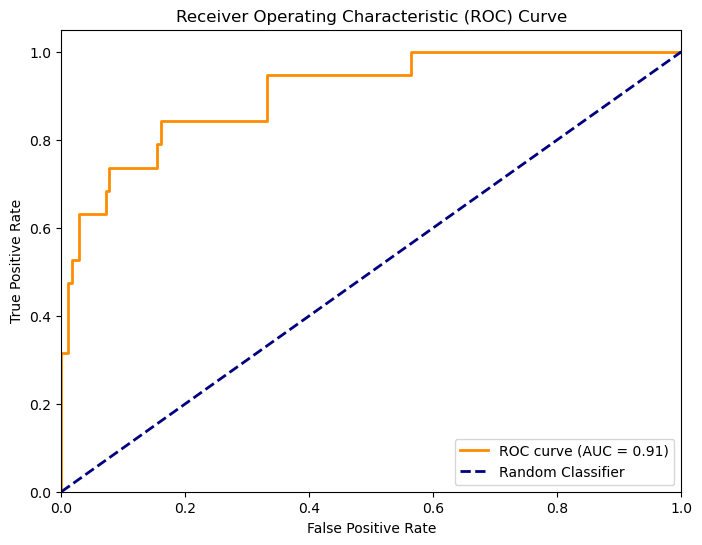

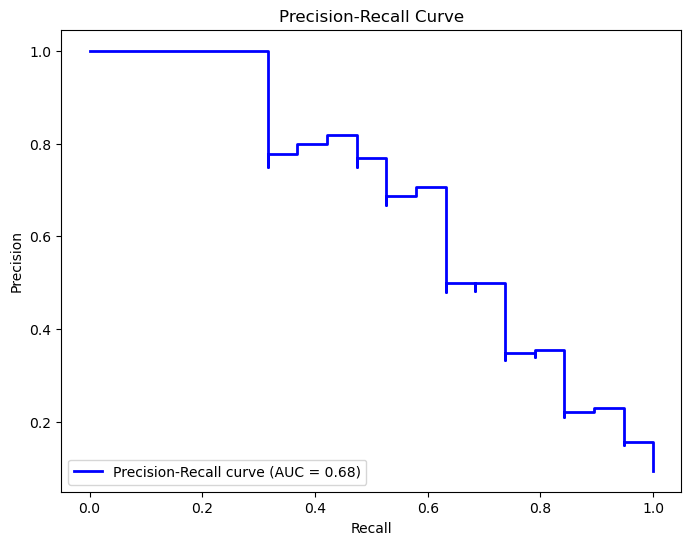

In [27]:
X_train, X_test = X[train_idx_svc], X[test_idx_svc]
Y_train, Y_test = Y[train_idx_svc], Y[test_idx_svc]

# ROC curve
decision_function = classifier2.decision_function(X_test)
fpr, tpr, _ = roc_curve(Y_test, decision_function)
roc_auc = auc(fpr, tpr)

# Calculate Precision-Recall curve
precision, recall, _ = precision_recall_curve(Y_test, decision_function)
pr_auc = average_precision_score(Y_test, decision_function)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.step(recall, precision, color='b', where='post', lw=2, label='Precision-Recall curve (AUC = %0.2f)' % pr_auc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()


---
**Task 11 (medium): ROC and Precision-Recall curves evaluation💡📽️**
1. Use the confusion matrix metrics to argue how the plots provide different insights into the classification model's ability to handle class imbalance? 
2. Describe when and why you would prioritize one curve over the other when dealing with imbalanced data.


---

In [ ]:
#Write your reflections here...
"""
When the dataset is imbalanced like ours the AUC is a lot more telling
"""

''